# Importing

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('features/features_pump.csv', index_col = 0)

# Cleaning

In [3]:
df.loc[:, 'abnormal'] = df['path'].apply(lambda string: 1 if 'abnormal' in string else 0)

In [4]:
df.head()

,array_percentile_10,array_percentile_20,array_percentile_30,array_percentile_40,array_percentile_50,array_percentile_60,array_percentile_70,array_percentile_80,array_percentile_90,array_mean,...,"fft_(2000, 5000)","fft_(5000, 16000)","fft_(16000, 160000)",path,rms_mean_0,spec_cent_mean_0,spec_bw_mean_0,rolloff_mean_0,zcr_mean_0,abnormal
0,-0.010830,-0.007339,-0.004650,-0.002262,0.000004,0.002270,0.004639,0.007301,0.010750,-7.599830e-07,...,0.001128,0.000668,0.000018,data/0_dB_pump/pump/id_04/normal/00000003.wav,NaN,NaN,NaN,NaN,NaN,0
1,-0.008019,-0.005299,-0.003345,-0.001652,-0.000050,0.001560,0.003284,0.005325,0.008080,2.797127e-07,...,0.001623,0.000404,0.000014,data/0_dB_pump/pump/id_04/normal/00000013.wav,NaN,NaN,NaN,NaN,NaN,0
2,-0.006237,-0.004097,-0.002549,-0.001209,0.000023,0.001247,0.002556,0.004093,0.006207,-5.841970e-07,...,0.001063,0.000357,0.000011,data/0_dB_pump/pump/id_04/normal/00000179.wav,NaN,NaN,NaN,NaN,NaN,0
3,-0.007214,-0.004749,-0.002937,-0.001377,0.000053,0.001503,0.003021,0.004765,0.007107,1.208544e-07,...,0.001359,0.000409,0.000012,data/0_dB_pump/pump/id_04/normal/00000235.wav,NaN,NaN,NaN,NaN,NaN,0
4,-0.005821,-0.003799,-0.002365,-0.001129,0.000011,0.001160,0.002377,0.003811,0.005795,-8.322000e-07,...,0.000924,0.000308,0.000011,data/0_dB_pump/pump/id_04/normal/00000186.wav,NaN,NaN,NaN,NaN,NaN,0


In [36]:
df.shape

(11821, 145)

In [30]:
np.inf

inf

In [38]:
df.columns[(df == -np.inf).any()]

Index(['array_entropy'], dtype='object')

In [39]:
df = df.drop('array_entropy', axis=1)

In [40]:
df[['abnormal']].value_counts()

abnormal
0           10453
1            1368
dtype: int64

In [41]:
drop = df.columns[df.isna().sum()> 50]

In [42]:
df = df.drop(drop, axis=1)

In [43]:
df.dropna(inplace=True)

# Setting xtrain, xtest, ytrain, ytest

In [44]:
X = df.drop(['path', 'abnormal'], axis=1)

In [67]:
X.shape

(11821, 142)

In [45]:
y = df['abnormal']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
meta_features = {
    'n_estimators': 100,
    'criterion': 'gini',
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_weight_fraction_leaf': 0.0,
    'max_features': 'auto',
    'max_leaf_nodes': None,
}

In [51]:
rfc = RandomForestClassifier(**meta_features)

In [52]:
X_train.isna().any().any()

False

In [65]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
rfc.score(X_test, y_test)

0.9682875264270613

In [57]:
predict_proba = rfc.predict_proba(X_test)

In [58]:
predict_proba

array([[0.94, 0.06],
       [0.99, 0.01],
       [0.91, 0.09],
       ...,
       [0.02, 0.98],
       [0.99, 0.01],
       [0.99, 0.01]])

In [68]:
X.columns

Index(['array_percentile_10', 'array_percentile_20', 'array_percentile_30',
       'array_percentile_40', 'array_percentile_50', 'array_percentile_60',
       'array_percentile_70', 'array_percentile_80', 'array_percentile_90',
       'array_mean',
       ...
       'mfcc_mean_19', 'fft_(0, 5)', 'fft_(5, 20)', 'fft_(20, 50)',
       'fft_(50, 200)', 'fft_(200, 500)', 'fft_(500, 2000)',
       'fft_(2000, 5000)', 'fft_(5000, 16000)', 'fft_(16000, 160000)'],
      dtype='object', length=142)

In [69]:
for i, j in zip(rfc.feature_importances_, X.columns):
    print(i, j)

0.010079648223873567 array_percentile_10
0.008674654581127792 array_percentile_20
0.004329770316739276 array_percentile_30
0.0038836842946367704 array_percentile_40
0.0032901390127314007 array_percentile_50
0.007397336277696354 array_percentile_60
0.010353213870253352 array_percentile_70
0.006487288868211874 array_percentile_80
0.005942264239172281 array_percentile_90
0.003288616500916045 array_mean
0.003822849019839413 array_median
0.015801682327272065 array_std
0.007079078621688975 array_kurtosis
0.0047381062688583485 array_skew
0.04274627529890877 array_min
0.027577178448626585 array_max
0.0032373474878215984 chroma_stft_mean_0
0.0036933917211862343 chroma_stft_mean_1
0.007638758134173993 chroma_stft_mean_2
0.004466983390012573 chroma_stft_mean_3
0.003541974877640601 chroma_stft_mean_4
0.00634327895936147 chroma_stft_mean_5
0.007867304288428516 chroma_stft_mean_6
0.0070412203933896 chroma_stft_mean_7
0.003955281018552113 chroma_stft_mean_8
0.005686219132129976 chroma_stft_mean_9
0.0

In [83]:
feat_imp = pd.DataFrame({'feature_importances':rfc.feature_importances_, 'features':X.columns})

In [86]:
feat_imp.set_index('feature_importances', inplace=True)

In [90]:
feat_imp.sort_index(ascending=False, inplace=True)

In [115]:
for i, j in feat_imp.iterrows():
    print(j.values[0], int(i*10000)/100)
    print(' ')

array_min 4.27
 
mfcc_mean_3 3.41
 
array_max 2.75
 
rms_percentile_80 2.33
 
rolloff_std 2.3
 
rms_max 2.12
 
spec_bw_max 2.06
 
rms_std 2.03
 
mfcc_mean_19 1.8
 
fft_(16000, 160000) 1.68
 
array_std 1.58
 
rms_percentile_90 1.49
 
rms_percentile_70 1.46
 
mfcc_mean_14 1.43
 
mfcc_mean_9 1.42
 
rolloff_entropy 1.39
 
spec_bw_std 1.29
 
rmsrms_mean 1.19
 
fft_(2000, 5000) 1.16
 
mfcc_mean_2 1.16
 
rms_percentile_60 1.13
 
spec_bw_entropy 1.09
 
mfcc_mean_0 1.08
 
chroma_stft_mean_11 1.07
 
mfcc_mean_4 1.07
 
array_percentile_70 1.03
 
array_percentile_10 1.0
 
mfcc_mean_7 0.98
 
spec_cent_std 0.91
 
mfcc_mean_6 0.91
 
rolloff_max 0.9
 
rms_entropy 0.88
 
array_percentile_20 0.86
 
mfcc_mean_16 0.79
 
fft_(500, 2000) 0.79
 
chroma_stft_mean_6 0.78
 
mfcc_mean_13 0.77
 
chroma_stft_mean_2 0.76
 
fft_(5000, 16000) 0.75
 
rolloff_skew 0.75
 
mfcc_mean_8 0.74
 
zcr_kurtosis 0.74
 
array_percentile_60 0.73
 
mfcc_mean_18 0.73
 
zcr_entropy 0.72
 
mfcc_mean_15 0.72
 
spec_cent_entropy 0.72
 


In [61]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.979


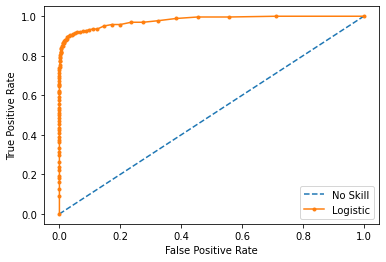

In [63]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

rfc.fit(X_train, y_train)
# predict probabilities
predict_proba = rfc.predict_proba(X_test)
rfc_probs = rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = rfc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Train-Test split based on id

In [ ]:
df.loc[:, 'abnormal'] = df['path'].apply(lambda string: 1 if 'abnormal' in string else 0)

In [94]:
df.loc[:, 'id'] = df['path'].apply(lambda string: string.split('/')[3])

In [95]:
df.head()

,array_percentile_10,array_percentile_20,array_percentile_30,array_percentile_40,array_percentile_50,array_percentile_60,array_percentile_70,array_percentile_80,array_percentile_90,array_mean,...,"fft_(20, 50)","fft_(50, 200)","fft_(200, 500)","fft_(500, 2000)","fft_(2000, 5000)","fft_(5000, 16000)","fft_(16000, 160000)",path,abnormal,id
0,-0.010830,-0.007339,-0.004650,-0.002262,0.000004,0.002270,0.004639,0.007301,0.010750,-7.599830e-07,...,0.004836,0.005128,0.010549,0.005971,0.001128,0.000668,0.000018,data/0_dB_pump/pump/id_04/normal/00000003.wav,0,id_04
1,-0.008019,-0.005299,-0.003345,-0.001652,-0.000050,0.001560,0.003284,0.005325,0.008080,2.797127e-07,...,0.010167,0.017303,0.026788,0.005571,0.001623,0.000404,0.000014,data/0_dB_pump/pump/id_04/normal/00000013.wav,0,id_04
2,-0.006237,-0.004097,-0.002549,-0.001209,0.000023,0.001247,0.002556,0.004093,0.006207,-5.841970e-07,...,0.004040,0.004649,0.010747,0.003910,0.001063,0.000357,0.000011,data/0_dB_pump/pump/id_04/normal/00000179.wav,0,id_04
3,-0.007214,-0.004749,-0.002937,-0.001377,0.000053,0.001503,0.003021,0.004765,0.007107,1.208544e-07,...,0.003519,0.005860,0.016144,0.003798,0.001359,0.000409,0.000012,data/0_dB_pump/pump/id_04/normal/00000235.wav,0,id_04
4,-0.005821,-0.003799,-0.002365,-0.001129,0.000011,0.001160,0.002377,0.003811,0.005795,-8.322000e-07,...,0.004535,0.007001,0.011371,0.002139,0.000924,0.000308,0.000011,data/0_dB_pump/pump/id_04/normal/00000186.wav,0,id_04


In [96]:
ids = df['id']

In [98]:
df_dict = {id_: df[df['id']==id_] for id_ in ids.unique()}

In [97]:
ids.unique()

array(['id_04', 'id_00', 'id_02', 'id_06'], dtype=object)

In [101]:
df_dict['id_04']

,array_percentile_10,array_percentile_20,array_percentile_30,array_percentile_40,array_percentile_50,array_percentile_60,array_percentile_70,array_percentile_80,array_percentile_90,array_mean,...,"fft_(20, 50)","fft_(50, 200)","fft_(200, 500)","fft_(500, 2000)","fft_(2000, 5000)","fft_(5000, 16000)","fft_(16000, 160000)",path,abnormal,id
0,-0.010830,-0.007339,-0.004650,-0.002262,0.000004,0.002270,0.004639,0.007301,0.010750,-7.599830e-07,...,0.004836,0.005128,0.010549,0.005971,0.001128,0.000668,0.000018,data/0_dB_pump/pump/id_04/normal/00000003.wav,0,id_04
1,-0.008019,-0.005299,-0.003345,-0.001652,-0.000050,0.001560,0.003284,0.005325,0.008080,2.797127e-07,...,0.010167,0.017303,0.026788,0.005571,0.001623,0.000404,0.000014,data/0_dB_pump/pump/id_04/normal/00000013.wav,0,id_04
2,-0.006237,-0.004097,-0.002549,-0.001209,0.000023,0.001247,0.002556,0.004093,0.006207,-5.841970e-07,...,0.004040,0.004649,0.010747,0.003910,0.001063,0.000357,0.000011,data/0_dB_pump/pump/id_04/normal/00000179.wav,0,id_04
3,-0.007214,-0.004749,-0.002937,-0.001377,0.000053,0.001503,0.003021,0.004765,0.007107,1.208544e-07,...,0.003519,0.005860,0.016144,0.003798,0.001359,0.000409,0.000012,data/0_dB_pump/pump/id_04/normal/00000235.wav,0,id_04
4,-0.005821,-0.003799,-0.002365,-0.001129,0.000011,0.001160,0.002377,0.003811,0.005795,-8.322000e-07,...,0.004535,0.007001,0.011371,0.002139,0.000924,0.000308,0.000011,data/0_dB_pump/pump/id_04/normal/00000186.wav,0,id_04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8415,-0.012814,-0.008415,-0.005245,-0.002499,0.000034,0.002583,0.005283,0.008373,0.012665,-1.942325e-06,...,0.013236,0.120719,0.060742,0.011637,0.003644,0.000407,0.000021,data/-6_dB_pump/pump/id_04/abnormal/00000000.wav,1,id_04
8416,-0.011608,-0.007687,-0.004822,-0.002346,0.000000,0.002308,0.004799,0.007717,0.011692,-4.889965e-08,...,0.006435,0.011067,0.025740,0.008112,0.003392,0.000571,0.000019,data/-6_dB_pump/pump/id_04/abnormal/00000035.wav,1,id_04
8417,-0.012802,-0.008419,-0.005257,-0.002522,-0.000023,0.002506,0.005188,0.008343,0.012836,5.419731e-07,...,0.024511,0.043362,0.069114,0.014071,0.003020,0.000327,0.000022,data/-6_dB_pump/pump/id_04/abnormal/00000038.wav,1,id_04
8418,-0.012547,-0.008270,-0.005238,-0.002583,-0.000084,0.002397,0.005051,0.008236,0.012638,-6.395078e-06,...,0.039226,0.047359,0.075250,0.013620,0.003439,0.000233,0.000021,data/-6_dB_pump/pump/id_04/abnormal/00000079.wav,1,id_04
